# AAE 722 Homework 4 - Wenshi (Gary) Sun
**Chapters 9 & 10**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

## Chapter 9 Question 2

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


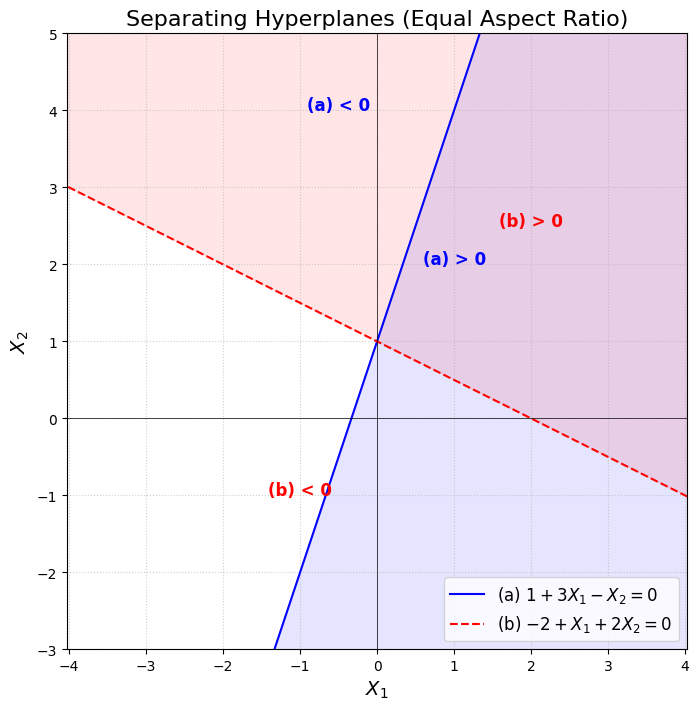

In [8]:
# Set the figure size (Square size helps reducing whitespace when using equal aspect)
plt.figure(figsize=(8, 8))
y_fill_min = -10
y_fill_max = 10
# 1. Define the range for X1
x1 = np.linspace(-5, 5, 100)

# ---------------------------
# Part (a): 1 + 3*X1 - X2 = 0  =>  X2 = 3*X1 + 1
# ---------------------------
x2_a = 3 * x1 + 1

# Plot (a)
plt.plot(x1, x2_a, '-b', label=r'(a) $1 + 3X_1 - X_2 = 0$')

plt.fill_between(x1, x2_a, y_fill_min, color='blue', alpha=0.1)

plt.text(1, 2, r'(a) > 0', color='blue', fontsize=12, ha='center', weight='bold')
plt.text(-0.5, 4, r'(a) < 0', color='blue', fontsize=12, ha='center', weight='bold')


# ---------------------------
# Part (b): -2 + X1 + 2*X2 = 0  =>  X2 = -0.5*X1 + 1
# ---------------------------
x2_b = -0.5 * x1 + 1

# Plot (b)
plt.plot(x1, x2_b, '--r', label=r'(b) $-2 + X_1 + 2X_2 = 0$')

plt.fill_between(x1, x2_b, y_fill_max, color='red', alpha=0.1)

plt.text(2, 2.5, r'(b) > 0', color='red', fontsize=12, ha='center', weight='bold')
plt.text(-1, -1, r'(b) < 0', color='red', fontsize=12, ha='center', weight='bold')


# ---------------------------
# CRITICAL FIX: Fix the aspect ratio to be equal
# This ensures slope 3 looks like slope 3
# ---------------------------
plt.axis('equal')


# ---------------------------
# Formatting
# ---------------------------
plt.xlabel(r'$X_1$', fontsize=14)
plt.ylabel(r'$X_2$', fontsize=14)
plt.title('Separating Hyperplanes (Equal Aspect Ratio)', fontsize=16)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(fontsize=12)

# Adjust limits to ensure we see the intersection and relevant areas
plt.xlim(-3, 3)
plt.ylim(-3, 5)

plt.show()

## Chapter 9 Question 5

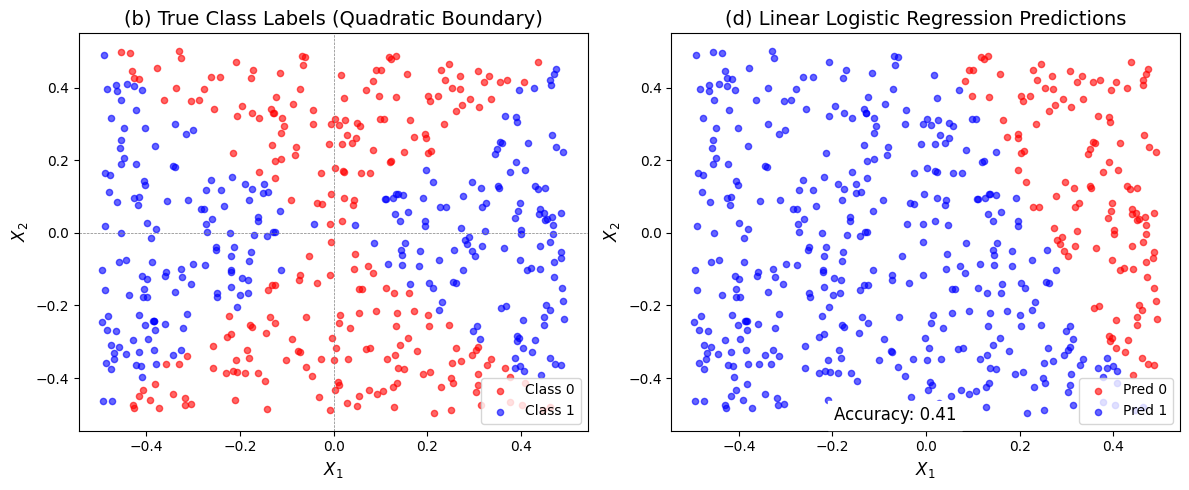

In [ ]:
# Part (a): Generate the data

# Set random seed for reproducibility
np.random.seed(42)

# Generate 500 random points between -0.5 and 0.5
n = 500
x1 = np.random.uniform(low=-0.5, high=0.5, size=n)
x2 = np.random.uniform(low=-0.5, high=0.5, size=n)

# Define the true classification rule: non-linear (quadratic)
# y is 1 if x1^2 - x2^2 > 0, else 0
y = (x1**2 - x2**2 > 0).astype(int)

# Combine x1 and x2 into a single matrix X for the model
X = np.column_stack((x1, x2))

# ==========================================
# Part (b): Plot the True Observations
# ==========================================
plt.figure(figsize=(12, 5))

# Subplot 1: The Ground Truth
plt.subplot(1, 2, 1)
# Scatter plot: color based on true label 'y'
plt.scatter(x1[y==0], x2[y==0], color='red', s=20, alpha=0.6, label='Class 0')
plt.scatter(x1[y==1], x2[y==1], color='blue', s=20, alpha=0.6, label='Class 1')
plt.xlabel(r'$X_1$', fontsize=12)
plt.ylabel(r'$X_2$', fontsize=12)
plt.title('(b) True Class Labels (Quadratic Boundary)', fontsize=14)
plt.legend()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)


# ==========================================
# Part (c): Fit Logistic Regression (Linear)
# ==========================================
# Initialize and train the model
# This model tries to find a line: b0 + b1*X1 + b2*X2 = 0
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)


# ==========================================
# Part (d): Predict and Plot
# ==========================================
# Predict class labels for the training data
y_pred_linear = log_reg.predict(X)

# Subplot 2: The Linear Prediction
plt.subplot(1, 2, 2)
# Scatter plot: color based on PREDICTED label 'y_pred_linear'
plt.scatter(x1[y_pred_linear==0], x2[y_pred_linear==0], color='red', s=20, alpha=0.6, label='Pred 0')
plt.scatter(x1[y_pred_linear==1], x2[y_pred_linear==1], color='blue', s=20, alpha=0.6, label='Pred 1')
plt.xlabel(r'$X_1$', fontsize=12)
plt.ylabel(r'$X_2$', fontsize=12)
plt.title('(d) Linear Logistic Regression Predictions', fontsize=14)
plt.legend()

# Check accuracy just for reference
acc_linear = accuracy_score(y, y_pred_linear)
plt.figtext(0.75, 0.15, f'Accuracy: {acc_linear:.2f}', fontsize=12, ha='center', backgroundcolor='white')

plt.tight_layout()
plt.show()

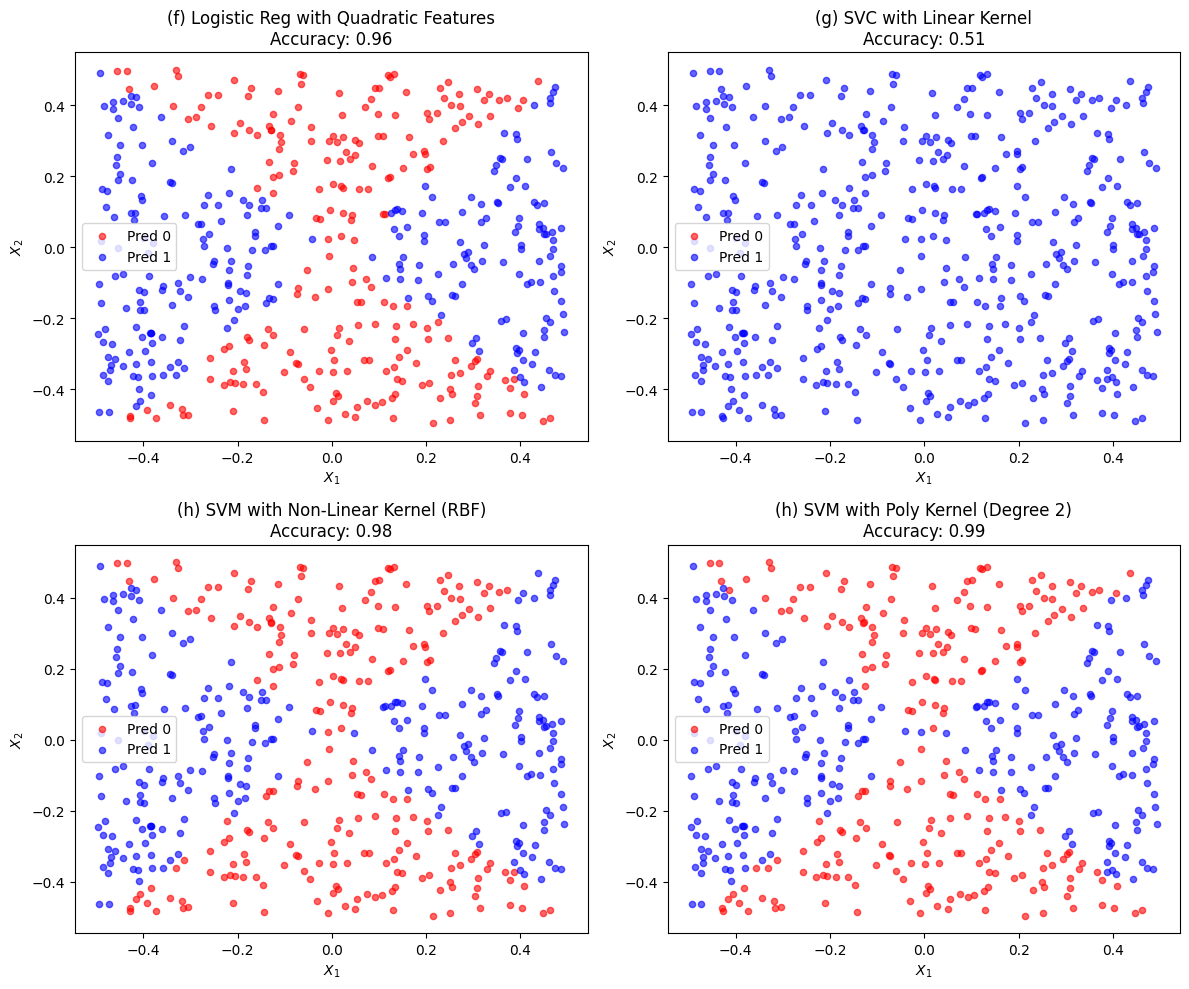

In [11]:
plt.figure(figsize=(12, 10))

# ==========================================
# Part (e) & (f): Logistic Regression with Non-Linear Features
# We explicitly add X1^2 and X2^2 as new features
# ==========================================

# Create non-linear features: X1, X2, X1^2, X2^2
# PolynomialFeatures(degree=2) automatically creates interaction terms too
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit Logistic Regression on these NEW features
log_reg_poly = LogisticRegression(random_state=42)
log_reg_poly.fit(X_poly, y)
y_pred_poly = log_reg_poly.predict(X_poly)

# Plot results for (f)
plt.subplot(2, 2, 1)
plt.scatter(x1[y_pred_poly==0], x2[y_pred_poly==0], color='red', s=20, alpha=0.6, label='Pred 0')
plt.scatter(x1[y_pred_poly==1], x2[y_pred_poly==1], color='blue', s=20, alpha=0.6, label='Pred 1')
plt.title(f'(f) Logistic Reg with Quadratic Features\nAccuracy: {accuracy_score(y, y_pred_poly):.2f}', fontsize=12)
plt.xlabel(r'$X_1$'); plt.ylabel(r'$X_2$')
plt.legend()


# ==========================================
# Part (g): Support Vector Classifier (Linear Kernel)
# This is expected to fail just like standard Logistic Regression
# ==========================================
svc_linear = SVC(kernel='linear', C=1.0, random_state=42)
svc_linear.fit(X, y)
y_pred_svc_lin = svc_linear.predict(X)

# Plot results for (g)
plt.subplot(2, 2, 2)
plt.scatter(x1[y_pred_svc_lin==0], x2[y_pred_svc_lin==0], color='red', s=20, alpha=0.6, label='Pred 0')
plt.scatter(x1[y_pred_svc_lin==1], x2[y_pred_svc_lin==1], color='blue', s=20, alpha=0.6, label='Pred 1')
plt.title(f'(g) SVC with Linear Kernel\nAccuracy: {accuracy_score(y, y_pred_svc_lin):.2f}', fontsize=12)
plt.xlabel(r'$X_1$'); plt.ylabel(r'$X_2$')
plt.legend()


# ==========================================
# Part (h): SVM with Non-Linear Kernel (RBF or Polynomial)
# This uses the "Kernel Trick" to handle non-linearity automatically
# ==========================================
# Using RBF (Radial Basis Function) kernel which is very powerful
svc_rbf = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)
svc_rbf.fit(X, y)
y_pred_svc_rbf = svc_rbf.predict(X)

# Plot results for (h)
plt.subplot(2, 2, 3)
plt.scatter(x1[y_pred_svc_rbf==0], x2[y_pred_svc_rbf==0], color='red', s=20, alpha=0.6, label='Pred 0')
plt.scatter(x1[y_pred_svc_rbf==1], x2[y_pred_svc_rbf==1], color='blue', s=20, alpha=0.6, label='Pred 1')
plt.title(f'(h) SVM with Non-Linear Kernel (RBF)\nAccuracy: {accuracy_score(y, y_pred_svc_rbf):.2f}', fontsize=12)
plt.xlabel(r'$X_1$'); plt.ylabel(r'$X_2$')
plt.legend()

# Compare with Polynomial Kernel (Degree 2) just to see
svc_poly = SVC(kernel='poly', degree=2, coef0=1, C=1.0, random_state=42)
svc_poly.fit(X, y)
y_pred_svc_poly = svc_poly.predict(X)

plt.subplot(2, 2, 4)
plt.scatter(x1[y_pred_svc_poly==0], x2[y_pred_svc_poly==0], color='red', s=20, alpha=0.6, label='Pred 0')
plt.scatter(x1[y_pred_svc_poly==1], x2[y_pred_svc_poly==1], color='blue', s=20, alpha=0.6, label='Pred 1')
plt.title(f'(h) SVM with Poly Kernel (Degree 2)\nAccuracy: {accuracy_score(y, y_pred_svc_poly):.2f}', fontsize=12)
plt.xlabel(r'$X_1$'); plt.ylabel(r'$X_2$')
plt.legend()

plt.tight_layout()
plt.show()

### (i) Comment on my results

* **Non-linear Data Structure:** The underlying data generation process involves a non-linear relationship ($X_1^2 - X_2^2 > 0$), creating a decision boundary that resembles a hyperbola (an "X" shape) rather than a straight line.
* **Failure of Linear Models:** Both the standard Logistic Regression and the SVM with a **linear kernel** performed poorly (Accuracy $\approx$ 0.40 - 0.50). This confirms that linear classifiers are incapable of separating data with complex, non-linear boundaries, as they are restricted to drawing a flat hyperplane.
* **Effectiveness of Feature Engineering:** By manually adding non-linear terms ($X_1^2, X_2^2$) to the Logistic Regression, the model was able to fit the data almost perfectly. This shows that linear models can work on non-linear data *if* we explicitly transform the features, but this requires prior knowledge of the data structure.
* **Power of Non-linear Kernels:** The SVMs using non-linear kernels (**Polynomial** and **RBF**) achieved excellent accuracy (Accuracy $\approx$ 0.98) **without** requiring manual feature engineering. This demonstrates the power of the "Kernel Trick," which effectively maps the data into a higher-dimensional space where the classes become linearly separable, allowing the model to automatically learn complex boundaries.

## Chapter 10: Question 2 (Page 465)
### (a) Proof: 
Adding a constant $c$ to each $z_\ell$ leaves the probability unchanged.Definition:The probability for class $m$, modeled by the softmax function, is given by1:$$P(Y=m|X) = \frac{e^{z_m}}{\sum_{\ell} e^{z_\ell}}$$Proof:Let us add a constant scalar $c$ to each score $z_\ell$. The new score is $z'_\ell = z_\ell + c$.We substitute these new scores into the softmax equation:$$P'(Y=m|X) = \frac{e^{z'_m}}{\sum_{\ell} e^{z'_\ell}} = \frac{e^{z_m + c}}{\sum_{\ell} e^{z_\ell + c}}$$Using the exponent rule $e^{a+b} = e^a \cdot e^b$, we can expand the terms:$$P'(Y=m|X) = \frac{e^{z_m} \cdot e^c}{\sum_{\ell} (e^{z_\ell} \cdot e^c)}$$Since $e^c$ is a common factor in the summation in the denominator, we can factor it out:$$P'(Y=m|X) = \frac{e^{z_m} \cdot e^c}{e^c \cdot \sum_{\ell} e^{z_\ell}}$$Now, we can cancel $e^c$ from the numerator and the denominator (since $e^c \neq 0$):$$P'(Y=m|X) = \frac{e^{z_m}}{\sum_{\ell} e^{z_\ell}} = P(Y=m|X)$$Conclusion:The probability is unchanged when a constant $c$ is added to every logit (score) $z_\ell$.
### (b) Proof: 
Adding constants $c_j$ to the corresponding coefficients for each class leaves the predictions unchanged.Context:In a linear model (like multinomial logistic regression or a neural network layer), the score (logit) for class $\ell$ is given by a linear combination of features $x_j$:$$z_\ell = \beta_{\ell 0} + \sum_{j=1}^p \beta_{\ell j} x_j$$where $\beta_{\ell j}$ is the coefficient for class $\ell$ corresponding to feature $j$.Proof:Suppose we add a constant $c_j$ to the coefficient of feature $j$ for every class $\ell$.The new coefficients are:$$\beta'_{\ell j} = \beta_{\ell j} + c_j \quad \text{for all } \ell \in \{0, \dots, K\} \text{ and } j \in \{0, \dots, p\}$$(Note: $x_0$ is typically 1, representing the intercept term).Let's calculate the new score $z'_\ell$ using these modified coefficients:$$z'_\ell = \sum_{j=0}^p \beta'_{\ell j} x_j = \sum_{j=0}^p (\beta_{\ell j} + c_j) x_j$$Expand the summation:$$z'_\ell = \sum_{j=0}^p \beta_{\ell j} x_j + \sum_{j=0}^p c_j x_j$$Notice that the first term is simply the original score $z_\ell$. The second term is a value that depends only on the input $x$ and the constants $c$, but it is independent of the class $\ell$. Let's call this term $C(x)$:$$C(x) = \sum_{j=0}^p c_j x_j$$Thus, for any class $\ell$, the new score is:$$z'_\ell = z_\ell + C(x)$$This means we are adding the same value $C(x)$ to the score of every class. Based on the result from Part (a), adding the same constant to all scores does not change the output probabilities.Conclusion:Since the new scores $z'_\ell$ differ from the original scores $z_\ell$ only by a value $C(x)$ common to all classes, the predicted probabilities (and thus the predictions) at any point $x$ remain unchanged.